<a href="https://colab.research.google.com/github/SandyGgit/DataScience/blob/master/Develop_a_Model_to_Predict_Ice_Cream_Sales_Using_Temperature_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **STEP #1: IMPORT LIBRARIES**

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **STEP #2: IMPORT DATASET**

In [0]:
# Import CSV file entitled "SalesData.csv"
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [4]:
# Print the first 5 rows
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
# Print the last 10 rows
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
# Print summary of the dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# Generate descriptive statistics
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# **STEP #3: VISUALIZE DATASET**

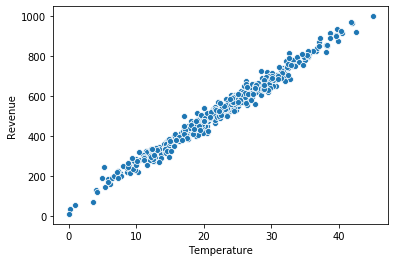

In [9]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

# **STEP #4: CREATE TESTING AND TRAINING DATASET**

In [0]:
# Testing and Training dataset
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

# **STEP #5: BUILD AND TRAIN THE MODEL**

In [71]:
X_train.shape

(500,)

In [72]:
y_train.shape

(500,)

In [0]:
# Build model using Keras api in a sequential fashion. "Dense" fully connected network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [76]:
# Train model using fit method
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
500/500 [==============================] - 0s 232us/sample - loss: 297872.9317
Epoch 2/1000
500/500 [==============================] - 0s 115us/sample - loss: 256890.9417
Epoch 3/1000
500/500 [==============================] - 0s 95us/sample - loss: 220227.5449
Epoch 4/1000
500/500 [==============================] - 0s 94us/sample - loss: 187279.6630
Epoch 5/1000
500/500 [==============================] - 0s 113us/sample - loss: 158374.6362
Epoch 6/1000
500/500 [==============================] - 0s 90us/sample - loss: 133078.6306
Epoch 7/1000
500/500 [==============================] - 0s 107us/sample - loss: 111002.9473
Epoch 8/1000
500/500 [==============================] - 0s 89us/sample - loss: 92259.2959
Epoch 9/1000
500/500 [==============================] - 0s 99us/sample - loss: 75882.7019
Epoch 10/1000
500/500 [==============================] - 0s 96us/sample - loss: 62051.7329
Epoch 11/1000
500/500 [==============================] - 0s 106us/sample - loss: 50377.7

# **STEP #6: EVALUATE THE MODEL** 

In [77]:
# Parameters
epochs_hist.history.keys()

dict_keys(['loss'])

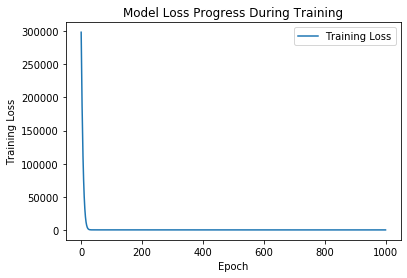

In [78]:
# Use matplotlib to visualize the loss
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [79]:
# Weights
model.get_weights()

[array([[21.391462]], dtype=float32), array([44.735973], dtype=float32)]

In [80]:
# Use the trained model to perform predictions
Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions using Trained ANN', Revenue )

Revenue Predictions using Trained ANN [[151.69328]]


Text(0.5, 1.0, 'Revenue Generated vs.Temperature @Ice Cream Stand')

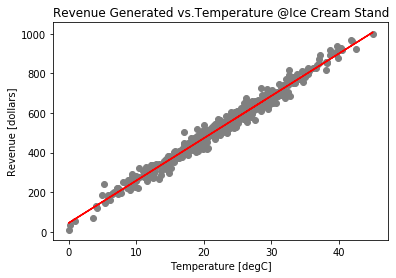

In [81]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue Generated vs.Temperature @Ice Cream Stand')

# **STEP #7 CONFIRM USING REGRESSION KIT IN SCIKIT LEARN**

In [0]:
X_train = X_train.values.reshape(-1,1)

In [83]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [0]:
y_train.shape

(500, 1)

In [92]:
# Use sklearn and import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Instantiate an object out of the class "LinearRegression". "fit_intercept" LinearRegression to return slope and y intercept
regressor = LinearRegression(fit_intercept = True)

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Print the slope and y intercept
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


Text(0.5, 1.0, 'Revenue Generated vs.Temperature @Ice Cream Stand')

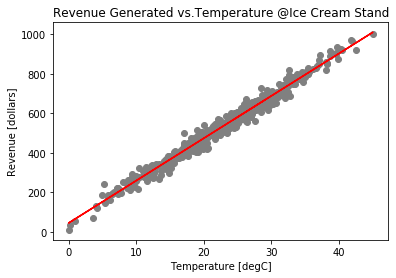

In [94]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.title('Revenue Generated vs.Temperature @Ice Cream Stand')